<a href="https://colab.research.google.com/github/logicpro09/group5/blob/main/Final_Project_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Victor Salcedo

Pawan Bishwokarma

Tadhbir Singh

Final Project Group 5

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [6]:
stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')


In [8]:
combined_df = pd.merge(stops_df, race_df, on='stop_id')
combined_df.head()

,stop_id,pid_x,resultkey,result,code,resulttext,pid_y,race
0,1,1,3,Citation for infraction,42127.0,12500(A) VC - DRIVE W/O LICENSE (I) 42127,1,Hispanic/Latino(a)
1,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Pacific Islander
2,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,White
3,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Black/African American
4,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Asian


In [9]:
print(combined_df.isnull().sum())

combined_df.dropna(inplace=True)

stop_id          0
pid_x            0
resultkey        0
result         526
code          3717
resulttext    3717
pid_y            0
race             0
dtype: int64


In [10]:
combined_df.to_csv('combined_df.csv', index=False)

In [12]:
print(combined_df.head())
combined_df.head()

   stop_id  pid_x  resultkey                   result     code  \
0        1      1          3  Citation for infraction  42127.0   
1        2      1          3  Citation for infraction  54303.0   
2        2      1          3  Citation for infraction  54303.0   
3        2      1          3  Citation for infraction  54303.0   
4        2      1          3  Citation for infraction  54303.0   

                                        resulttext  pid_y  \
0        12500(A) VC - DRIVE W/O LICENSE (I) 42127      1   
1  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   
2  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   
3  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   
4  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   

                     race  
0      Hispanic/Latino(a)  
1        Pacific Islander  
2                   White  
3  Black/African American  
4                   Asian  


,stop_id,pid_x,resultkey,result,code,resulttext,pid_y,race
0,1,1,3,Citation for infraction,42127.0,12500(A) VC - DRIVE W/O LICENSE (I) 42127,1,Hispanic/Latino(a)
1,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Pacific Islander
2,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,White
3,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Black/African American
4,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Asian


In [15]:
#stops = 8316
stop_counts = combined_df.groupby('stop_id').size()
print(stop_counts)

stop_id
1       1
2       7
3       1
4       1
5       7
       ..
8312    2
8313    1
8314    1
8315    3
8316    1
Length: 6189, dtype: int64


In [18]:
#aggregate data by race and results
grouped_data = combined_df.groupby(['race', 'result']).size().reset_index(name='StopCount')

In [19]:
# convert cataegorical variables, race and result to numerical
encoded_data = pd.get_dummies(grouped_data, columns=['race', 'result'], drop_first=True)

In [20]:
#perform linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = encoded_data.drop('StopCount', axis=1)
y = encoded_data['StopCount']

reg_model = LinearRegression()
reg_model.fit(X, y)

print("Intercept:", reg_model.intercept_)
print("Coefficients:", reg_model.coef_)

Intercept: 320.74999999999983
Coefficients: [ 233.5         -24.60714286  683.5         -30.75       -129.75
 -113.5         646.75       -291.14285714 -446.         -553.25
   53.14285714]


In [21]:
#check correlation
correlation_matrix = encoded_data.corr()
print(correlation_matrix)

                                         StopCount  \
StopCount                                 1.000000   
race_Black/African American              -0.005302   
race_Hispanic/Latine(x)                  -0.131635   
race_Hispanic/Latino(a)                   0.472249   
race_Middle Eastern or South Asian       -0.174774   
race_Native American                     -0.264456   
race_Pacific Islander                    -0.249735   
race_White                                0.438958   
result_Custodial Arrest without warrant  -0.172951   
result_In-field cite and release         -0.322268   
result_Verbal Warning                    -0.133350   
result_Warning (verbal or written)        0.313701   

                                         race_Black/African American  \
StopCount                                                  -0.005302   
race_Black/African American                                 1.000000   
race_Hispanic/Latine(x)                                    -0.083045   
race_Hisp

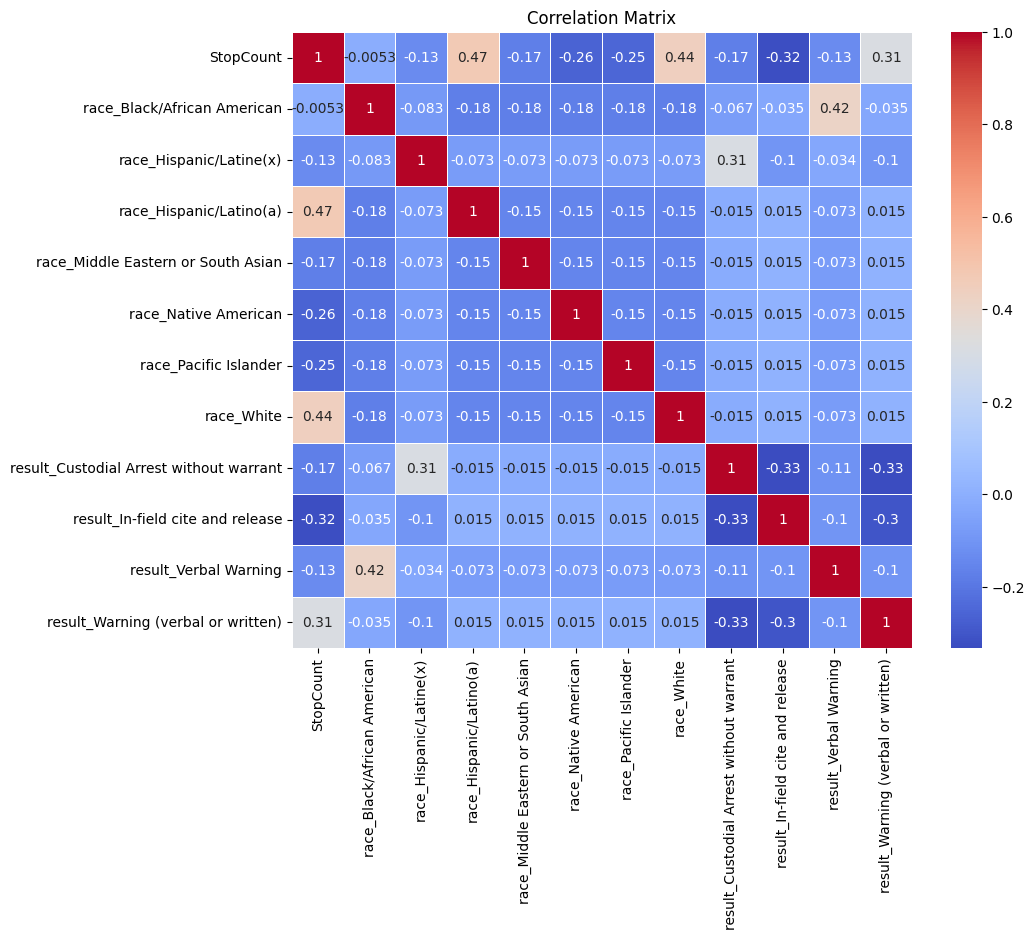

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

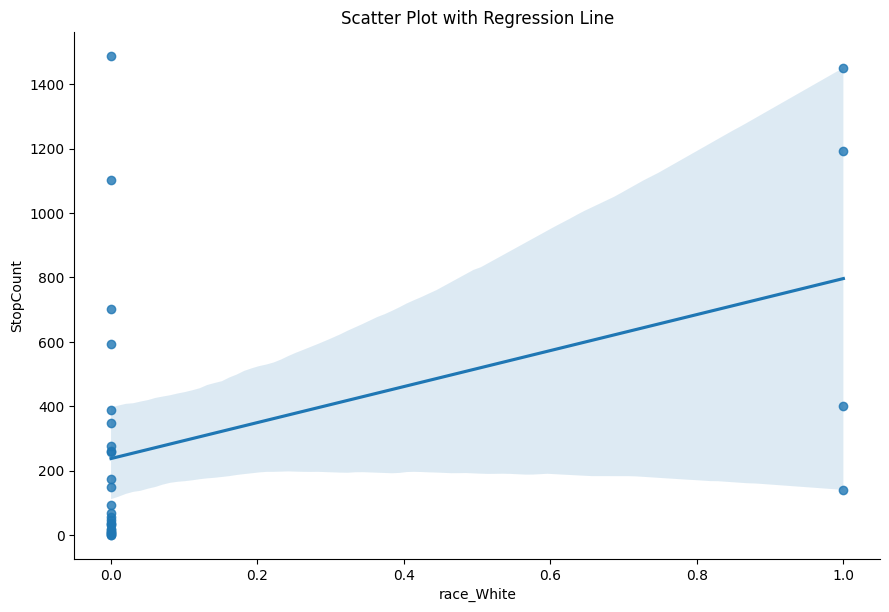

In [23]:
#scatter plot with linear regression line between stopcount and race
sns.lmplot(x='race_White', y = 'StopCount', data=encoded_data, height=6, aspect=1.5)
plt.title('Scatter Plot with Regression Line')
plt.show()

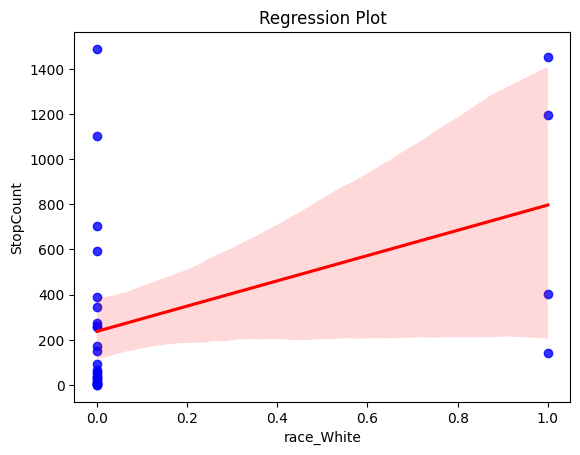

In [24]:
#regression plot for two variables
sns.regplot(x='race_White', y='StopCount', data=encoded_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regression Plot')
plt.show()